In [ ]:
%pip install textgrad
%pip install git+https://github.com/microsoft/Trace.git
%pip install dask[dataframe]
%pip install autogen

In [ ]:
import os
import openai

os.environ['OPENAI_API_KEY'] = ""

OAI_CONFIG_LIST = [ { "model": "gpt-4o-mini", "api_key": os.environ['OPENAI_API_KEY'],}]

import json; config_file_path = "/content/config_list.json"; json.dump(OAI_CONFIG_LIST, open(config_file_path, "w")); os.environ['OAI_CONFIG_LIST'] = config_file_path

In [ ]:
from opto import trace
from opto.optimizers import OptoPrime, OptoPrimeMulti

import random
import time

In [4]:
# We'll use below utilities to run a python function.
from IPython.core.interactiveshell import InteractiveShell

def run_function_in_interpreter(func_code):
    # raise Exception("This function will run the code returned by GPT-4o. Remove this if you'd like to run the code!")
    interpreter = InteractiveShell.instance()

    interpreter.run_cell(func_code, store_history=False, silent=True)

    func_name = func_code.split("def ")[1].split("(")[0].strip()
    func = interpreter.user_ns[func_name]

    return func



def test_longest_increasing_subsequence(fn):
    nums = [10, 22, 9, 33, 21, 50, 41, 60]
    assert fn(nums) == 5

    nums = [7, 2, 1, 3, 8, 4, 9, 6, 5]
    assert fn(nums) == 4

    nums = [5, 4, 3, 2, 1]
    assert fn(nums) == 1

    nums = [1, 2, 3, 4, 5]
    assert fn(nums) == 5

    nums = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5]
    assert fn(nums) == 4

    nums = [10, 9, 2, 5, 3, 7, 101, 18]
    assert fn(nums) == 4

    nums = [0, 8, 4, 12, 2, 10, 6, 14, 1, 9, 5, 13, 3, 11, 7, 15]
    assert fn(nums) == 6

    nums = [7, 7, 7, 7, 7, 7, 7]
    assert fn(nums) == 1

    nums = [20, 25, 47, 35, 56, 68, 98, 101, 212, 301, 415, 500]
    assert fn(nums) == 11

    nums = [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
    assert fn(nums) == 1

    print("All test cases passed!")

In [5]:
problem_text = """Longest Increasing Subsequence (LIS)

Problem Statement:
Given a sequence of integers, find the length of the longest subsequence that is strictly increasing. A subsequence is a sequence that can be derived from another sequence by deleting some or no elements without changing the order of the remaining elements.

Input:
The input consists of a list of integers representing the sequence.

Output:
The output should be an integer representing the length of the longest increasing subsequence."""

initial_solution = """
def longest_increasing_subsequence(nums):
    n = len(nums)
    dp = [1] * n

    for i in range(1, n):
        for j in range(i):
            if nums[i] > nums[j]:
                dp[i] = max(dp[i], dp[j] + 1)

    max_length = max(dp)
    lis = []

    for i in range(n - 1, -1, -1):
        if dp[i] == max_length:
            lis.append(nums[i])
            max_length -= 1

    return len(lis[::-1])
"""

# Generate a random test case
def generate_random_test_case(size, min_value, max_value):
    return [random.randint(min_value, max_value) for _ in range(size)]

# Test the function with a random test case
size = 10000  # Adjust the size as needed
min_value = 1
max_value = 1000

nums = generate_random_test_case(size, min_value, max_value)


In [6]:
longest_increasing_subsequence = run_function_in_interpreter(initial_solution)

start_time = time.time()
lis = longest_increasing_subsequence(nums)
end_time = time.time()

print(f"Test Case Size: {size}")
print(f"Longest Increasing Subsequence Length: {lis}")
print(f"Runtime: {end_time - start_time:.5f} seconds")

# Test for all test cases
test_longest_increasing_subsequence(longest_increasing_subsequence)

Test Case Size: 10000
Longest Increasing Subsequence Length: 176
Runtime: 12.51021 seconds
All test cases passed!


# Trace code


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/local/lib/python3.10/dist-packages/opto/trace/bundle.py", line 359, in sync_call_fun
    sys.settrace(oldtracer)



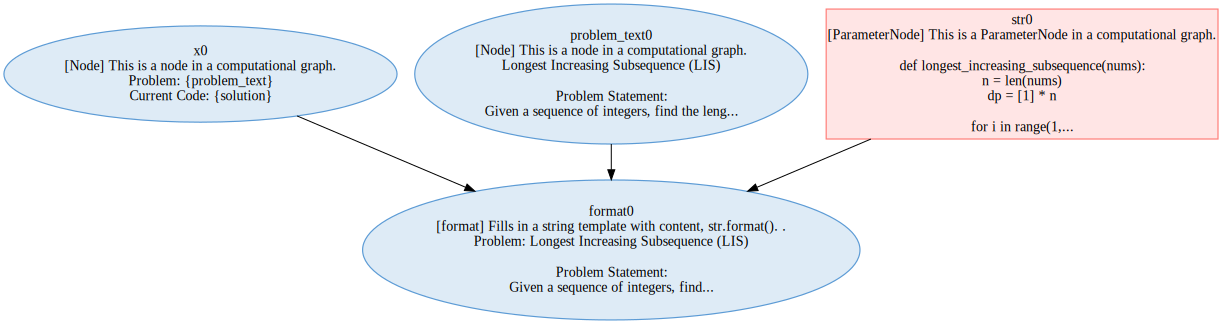

In [8]:

code = trace.node(initial_solution, trainable=True)
opt = OptoPrimeMulti([code])

feedback = "Think about the problem and the code snippet. Does the code solve the problem? What is the runtime complexity? Improve the runtime complexity of the code."
format_string = "Problem: {problem_text}\nCurrent Code: {solution}"

from opto.trace import operators as ops
problem = ops.format(format_string, problem_text=problem_text, solution=code)
opt.zero_feedback()

# Let's visualize our computation graph.
problem.backward(feedback, visualize=True)


In [9]:
# Let's update the code
opt.step(verbose='output')


Temperatures for responses: [1.3, 0.9750000000000001, 0.65, 0.32499999999999996, 0.0]
LLM responses:
 ['{\n"reasoning": "The #Instruction asks for changes in #Variables based on #Feedback about improving the output. The #Feedback indicates that while the current code solves the problem of finding the length of the longest increasing subsequence, the runtime complexity of the algorithm is O(n^2), which can be optimized to O(n log n) using binary search. Therefore, the suggested improvement involves changing `str0` to implement a more efficient version of the longest increasing subsequence algorithm. A common approach is to utilize a list to track the smallest tail for all subsequences of a given length.",\n"answer": "",\n"suggestion": {\n    "str0": "def longest_increasing_subsequence(nums):\\n    from bisect import bisect_left\\n    if not nums:\\n        return 0\\n    lis = []\\n    for x in nums:\\n        i = bisect_left(lis, x)\\n        if i == len(lis):\\n            lis.append(

In [10]:
for c in opt.candidates:
  print(f"{c}\n")

{<opto.trace.nodes.ParameterNode object at 0x7c4662f75ff0>: 'def longest_increasing_subsequence(nums):\n    from bisect import bisect_left\n    if not nums:\n        return 0\n    lis = []\n    for x in nums:\n        i = bisect_left(lis, x)\n        if i == len(lis):\n            lis.append(x)\n        else:\n            lis[i] = x\n    return len(lis)'}

{<opto.trace.nodes.ParameterNode object at 0x7c4662f75ff0>: 'def longest_increasing_subsequence(nums):\n    from bisect import bisect_left\n    lis = []\n    for num in nums:\n        pos = bisect_left(lis, num)\n        if pos == len(lis):\n            lis.append(num)\n        else:\n            lis[pos] = num\n    return len(lis)'}

{<opto.trace.nodes.ParameterNode object at 0x7c4662f75ff0>: 'def longest_increasing_subsequence(nums):\n    from bisect import bisect_left\n    subsequence = []\n    for num in nums:\n        pos = bisect_left(subsequence, num)\n        if pos == len(subsequence):\n            subsequence.append(num)\n 

In [23]:
# Test all candidates and log execution times
execution_results = []

for i, candidate in enumerate(opt.candidates):
    if not candidate:  # Skip invalid candidates
        print(f"Candidate {i+1}: Skipped (Invalid)")
        continue

    # Extract the function code from the dictionary
    func_code = list(candidate.values())[0]  # Assumes there's only one key-value pair in the dictionary
    if not func_code:
        print(f"Candidate {i+1}: No code found")
        continue

    # Compile and run the function
    func = run_function_in_interpreter(func_code)  # Extract and run candidate function
    try:
        start_time = time.time()
        result = func(nums)  # Test the function
        end_time = time.time()

        runtime = end_time - start_time
        execution_results.append({
            "candidate": i + 1,
            "result": result,
            "runtime": runtime
        })

        func_code_nonl = func_code.replace('\n',' ')
        print(f"Candidate {i+1}:")
        print(f"  Longest Increasing Subsequence Length: {result}")
        print(f"  Runtime: {runtime:.5f} seconds")
        print(f"  Code: <<<{func_code_nonl}>>>\n")

    except Exception as e:
        print(f"Candidate {i+1}: Failed with error: {e}\n")

# Display a summary of all candidate results
print("Execution Summary:")
for res in execution_results:
    print(f"Candidate {res['candidate']}: Result = {res['result']}, Runtime = {res['runtime']:.5f} seconds")


Candidate 1:
  Longest Increasing Subsequence Length: 176
  Runtime: 0.00793 seconds
  Code: <<<def longest_increasing_subsequence(nums):     from bisect import bisect_left     if not nums:         return 0     lis = []     for x in nums:         i = bisect_left(lis, x)         if i == len(lis):             lis.append(x)         else:             lis[i] = x     return len(lis)>>>

Candidate 2:
  Longest Increasing Subsequence Length: 176
  Runtime: 0.01296 seconds
  Code: <<<def longest_increasing_subsequence(nums):     from bisect import bisect_left     lis = []     for num in nums:         pos = bisect_left(lis, num)         if pos == len(lis):             lis.append(num)         else:             lis[pos] = num     return len(lis)>>>

Candidate 3:
  Longest Increasing Subsequence Length: 176
  Runtime: 0.01116 seconds
  Code: <<<def longest_increasing_subsequence(nums):     from bisect import bisect_left     subsequence = []     for num in nums:         pos = bisect_left(subsequence

In [16]:
# Hopefully, we should get much better runtime!
longest_increasing_subsequence = run_function_in_interpreter(code.data)

start_time = time.time()
lis = longest_increasing_subsequence(nums)
end_time = time.time()

print(f"Longest Increasing Subsequence Length: {lis}")
print(f"Runtime: {end_time - start_time:.5f} seconds")

test_longest_increasing_subsequence(longest_increasing_subsequence)

Longest Increasing Subsequence Length: 176
Runtime: 0.00555 seconds
All test cases passed!


At this point, OptoPrime in Trace solves the problem. There's no need to further iterate.

In [12]:
print(code.data)

def longest_increasing_subsequence(nums):
    from bisect import bisect_left
    lis = []
    for num in nums:
        pos = bisect_left(lis, num)
        if pos == len(lis):
            lis.append(num)
        else:
            lis[pos] = num
    return len(lis)
